In [6]:
import numpy as np

In [7]:
def sigmoid(x):
    '''Sigmoid-like function using tanh'''
    return np.tanh(x)

In [8]:
def dsigmoid(x):
    '''Derivative of sigmoid above'''
    return 1.0-x**2

In [9]:
class MLP:
    ''' Multi-layer perceptron class. '''

    def __init__(self, *args):
        ''' Initialization of the perceptron with given sizes.  '''

        self.shape = args
        n = len(args)

        # Build layers
        self.layers = []
        # Input layer (+1 unit for bias)
        self.layers.append(np.ones(self.shape[0]+1))
        # Hidden layer(s) + output layer
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))

        # Build weights matrix (randomly between -0.25 and +0.25)
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                         self.layers[i+1].size)))

        # dw will hold last change in weights (for momentum)
        self.dw = [0,]*len(self.weights)

        # Reset weights
        self.reset()

    def reset(self):
        ''' Reset weights '''

        for i in range(len(self.weights)):
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            self.weights[i][...] = (2*Z-1)*0.25

    def propagate_forward(self, data):
        ''' Propagate data from input layer to output layer. '''

        # Set input layer
        self.layers[0][0:-1] = data

        # Propagate from layer 0 to layer n-1 using sigmoid as activation function
        for i in range(1,len(self.shape)):
            # Propagate activity
            self.layers[i][...] = sigmoid(np.dot(self.layers[i-1],self.weights[i-1]))

        # Return output
        return self.layers[-1]


    def propagate_backward(self, target, lrate=0.1, momentum=0.1):
        ''' Back propagate error related to target using lrate. '''

        deltas = []

        # Compute error on output layer
        error = target - self.layers[-1]
        delta = error*dsigmoid(self.layers[-1])
        deltas.append(delta)

        # Compute error on hidden layers
        for i in range(len(self.shape)-2,0,-1):
            delta = np.dot(deltas[0],self.weights[i].T)*dsigmoid(self.layers[i])
            deltas.insert(0,delta)
            
        # Update weights
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            dw = np.dot(layer.T,delta)
            self.weights[i] += lrate*dw + momentum*self.dw[i]
            self.dw[i] = dw

        # Return error
        return (error**2).sum()

Learning the sin function


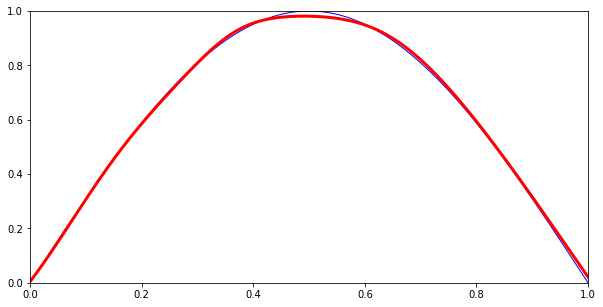

In [17]:
if __name__ == '__main__':
    import matplotlib
    import matplotlib.pyplot as plt

    def learn(network,samples, epochs=2500, lrate=.1, momentum=0.1):
        # Train 
        for i in range(epochs):
            n = np.random.randint(samples.size)
            network.propagate_forward( samples['input'][n] )
            network.propagate_backward( samples['output'][n], lrate, momentum )
        # Test
        for i in range(samples.size):
            o = network.propagate_forward( samples['input'][i] )
            print (i, samples['input'][i], '%.2f' % o[0],)
            print ('(expected %.2f)' % samples['output'][i])
        print()

        
        
        
    print ("Learning the sin function")
    network = MLP(1,10,1)
    samples = np.zeros(1000, dtype=[('x',  float, 1), ('y', float, 1)])
    samples['x'] = np.linspace(0,1,1000)
    samples['y'] = np.sin(samples['x']*np.pi)

    for i in range(1000000):
        n = np.random.randint(samples.size)
        network.propagate_forward(samples['x'][n])
        network.propagate_backward(samples['y'][n])

    plt.figure(figsize=(10,5))
    # Draw real function
    x,y = samples['x'],samples['y']
    plt.plot(x,y,color='b',lw=1)
    # Draw network approximated function
    for i in range(samples.shape[0]):
        y[i] = network.propagate_forward(x[i])
    plt.plot(x,y,color='r',lw=3)
    plt.axis([0,1,0,1])
    plt.show()